In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install kneed
from kneed import KneeLocator
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # untuk 3D plotting

In [113]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [115]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [116]:
# rename the Income($) column
df = df.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


VISUALIZATION

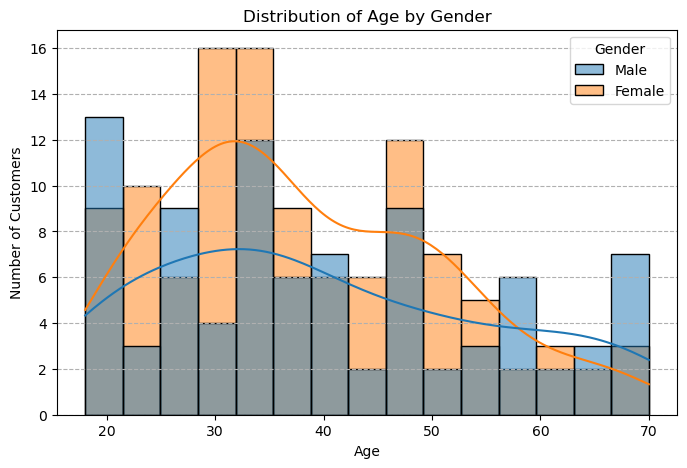

In [117]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Gender", kde=True, bins=15)
plt.title("Distribution of Age by Gender")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--')
plt.show()


Grafik diatas memperlihatkan mayoritas pembeli berumur 25-35, setelah usia 35 daya beli cenderung menurun. Target utama pelanggan mall adalah kelompok usia 25–35 tahun, terutama perempuan. Strategi promosi, produk, dan desain toko bisa diarahkan untuk segmen muda dewasa

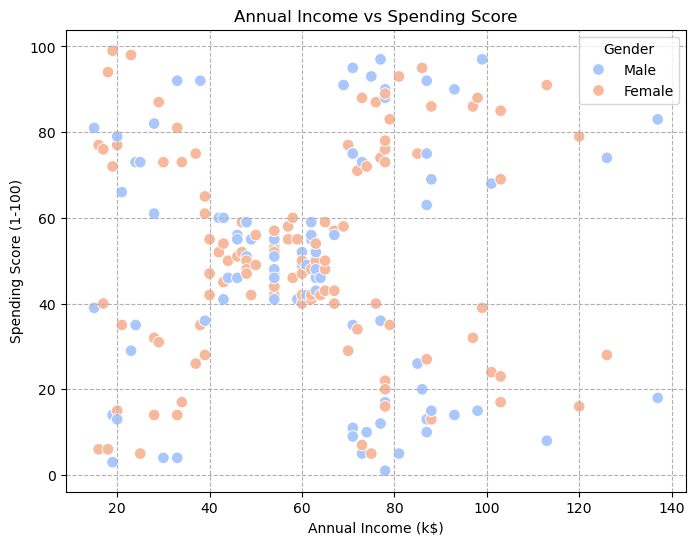

In [119]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual Income", y="Spending Score", hue="Gender", palette="coolwarm", s=70)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True, linestyle='--')
plt.show()


Scatter plot diatas menunjukan annual income seseorang semakin tinggi tidak menjamin spending score seseorang juga tinggi. Karena bisa dilihat dari scatter plot diatas, titik" nya cukup menyebar

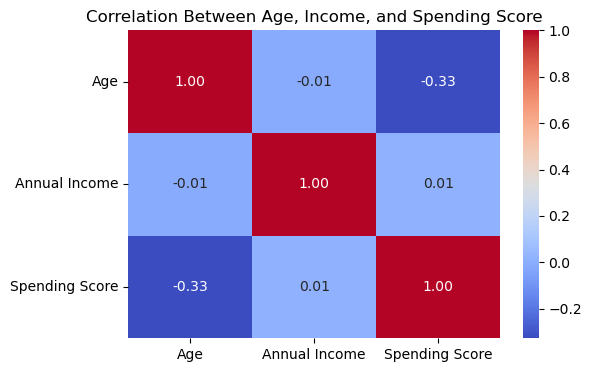

In [120]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Age", "Annual Income", "Spending Score"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Age, Income, and Spending Score")
plt.show()


Heatmap diatas menunjukan korelasi antar variabel. Usia berpengaruh terhadap kebiasaan belanja, pelanggan muda (usia 20–30-an) cenderung lebih konsumtif. Pendapatan tidak selalu menentukan besar pengeluaran

In [121]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {'Gender': {'Female': 0, 'Male': 1}}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


df_encoded.head()


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


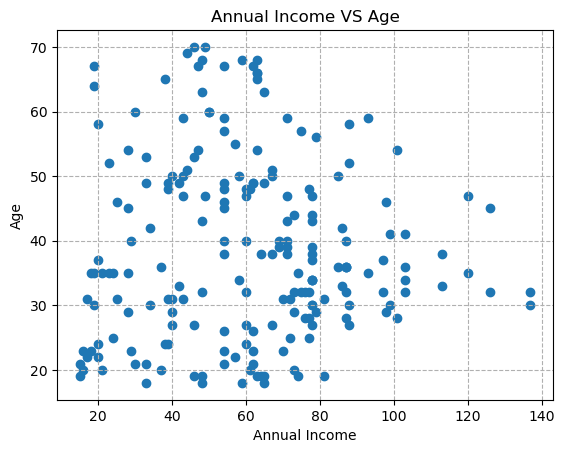

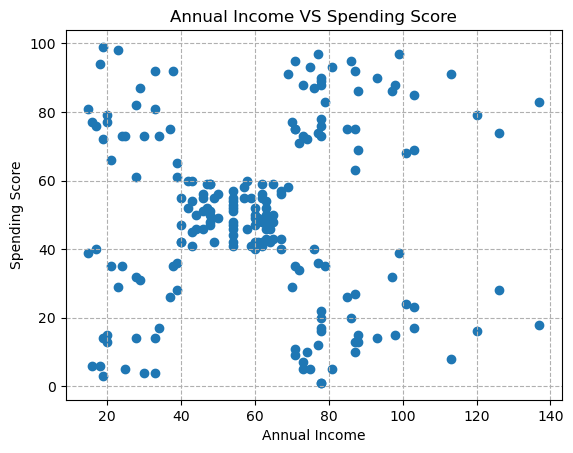

In [122]:
plt.scatter(df_encoded['Annual Income'], df_encoded['Age'])
plt.title('Annual Income VS Age')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

plt.scatter(df_encoded['Annual Income'], df_encoded['Spending Score'])
plt.title('Annual Income VS Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

Karena rentang data nya cukup jauh dari 20 - 140, maka dilakukan standart scalling untuk memperkecil rentang dan menemukan k

In [123]:
# create new dataframe that consist only annual income and spending score
df_encoded = df_encoded[['Age', 'Annual Income', 'Spending Score', 'Gender']]
df_encoded.head()

,Age,Annual Income,Spending Score,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


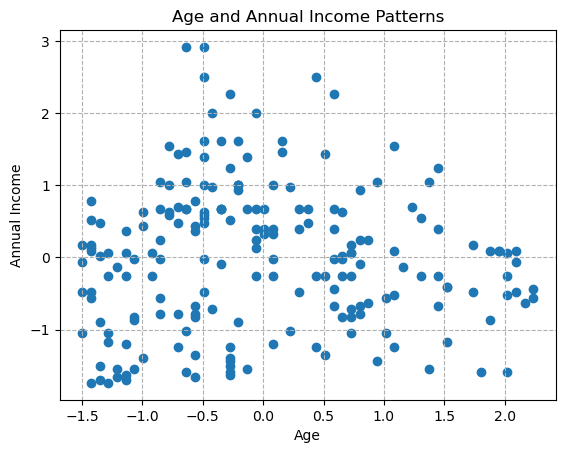

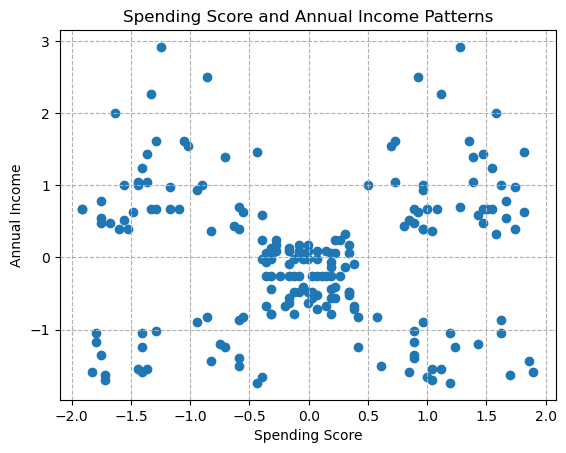

In [124]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df_encoded), columns=["Age", "Annual Income", "Spending Score", "Gender"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Annual Income"])
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Annual Income Patterns")
plt.show()

# visualization
plt.scatter(df_sc_scaled["Spending Score"], df_sc_scaled["Annual Income"])
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.grid(axis='both', linestyle='--')
plt.title("Spending Score and Annual Income Patterns")
plt.show()

# K-Means Clustering

In [125]:
from sklearn.cluster import KMeans

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

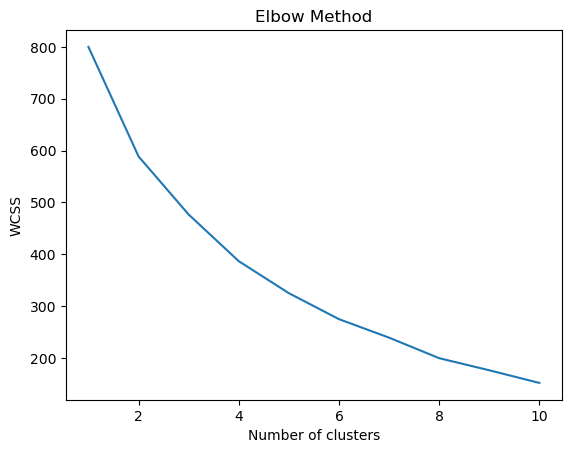

In [126]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [127]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  800.000000
1                   2  588.802677
2                   3  476.787554
3                   4  386.828426
4                   5  325.094980
5                   6  275.030671
6                   7  239.327862
7                   8  199.750461
8                   9  176.419096
9                  10  152.029834


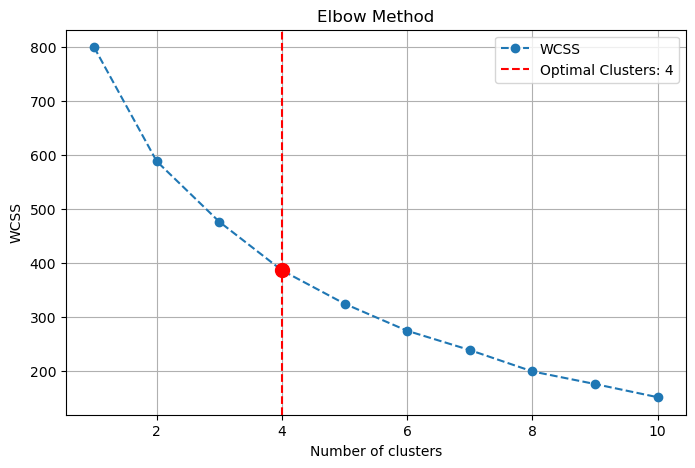

The optimal number of clusters is: 4


In [128]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [129]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df_encoded['KMeans_Cluster'] = clusters

# Show the df
df_encoded.head()

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income,Spending Score,Gender,KMeans_Cluster
0,19,15,39,1,1
1,21,15,81,1,1
2,20,16,6,0,2
3,23,16,77,0,1
4,31,17,40,0,2


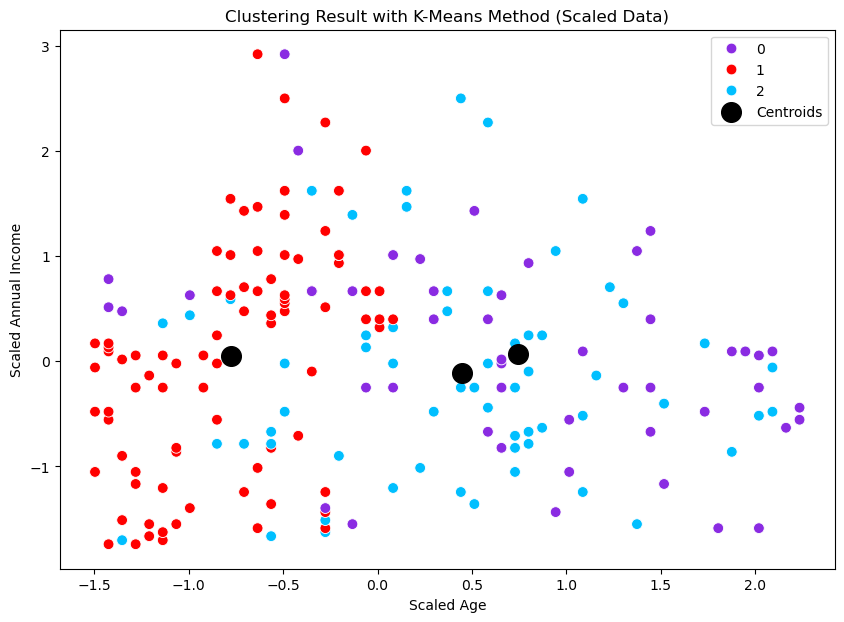

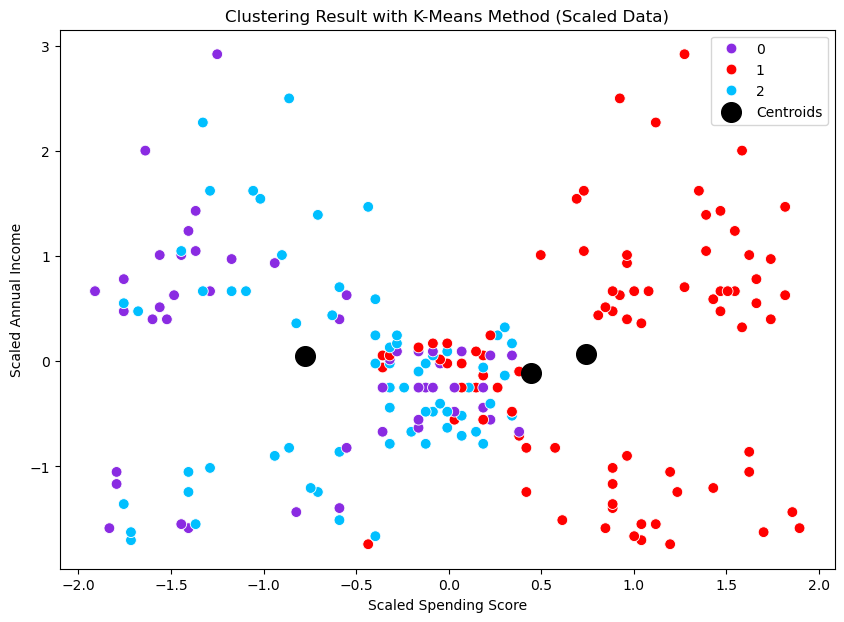

In [130]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))

sns.scatterplot(x = "Spending Score", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Spending Score")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

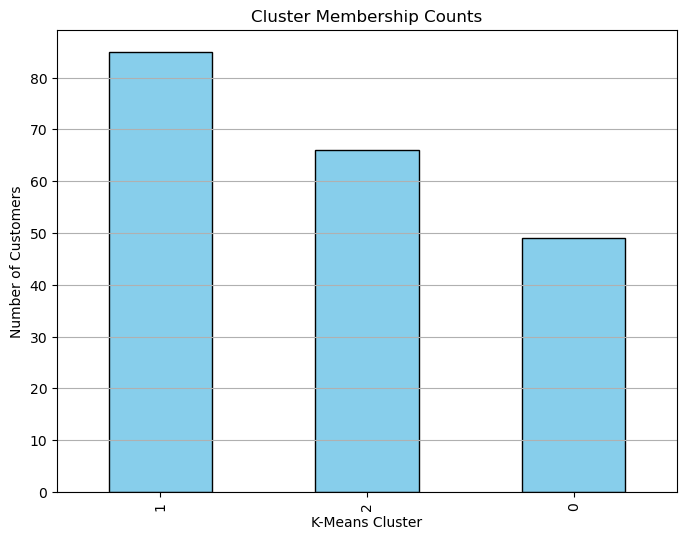

In [132]:
cluster_counts = df_encoded['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


cluster 1 mendominasi pembelian di mall

In [137]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_encoded.groupby(clusters).agg({'Age': ['mean', 'min', 'max'],
                                              'Annual Income': ['mean', 'min', 'max'],
                                              'Spending Score': ['mean', 'min', 'max'],
                                              'Gender': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age         Annual Income          Spending Score      \
                     mean min max          mean min  max           mean min   
KMeans_cluster                                                                
0               49.204082  19  70     62.244898  19  137      29.734694   1   
1               28.047059  18  40     61.788235  15  137      72.882353  39   
2               45.075758  20  68     57.727273  16  126      36.181818   5   

                      Gender          
               max      mean min max  
KMeans_cluster                        
0               60  1.000000   1   1  
1               99  0.458824   0   1  
2               59  0.000000   0   0

Cluster 0 – Mature Professionals

Profile: 
- Average age: 49 tahun (kisaran 19–70)
- Average income: menengah ke atas ($62k/tahun)
- Spending score: rendah (30)
- Mostly male (gender = 1 → male)
- Mungkin tipe pelanggan hemat, lebih fokus pada kebutuhan daripada keinginan.

Managerial Implications:
- Targeting: Value-oriented atau loyal customer segment (hemat tapi stabil).
- Campaign channel: Email marketing atau loyalty program — bukan impulsif, jadi pendekatan edukatif lebih cocok.
- Pricing/Offer design: diskon bundling atau reward poin untuk mendorong repeat purchase.
- Retention idea: Memberikan benefit eksklusif seperti priority service atau after-sales support

---

Cluster 1 – Young High Spenders

Profile:
- Average age: 28 tahun (kisaran 18–40)
- Average income: menengah ($61k/tahun)
- Spending score:tinggi (73)
- Gender mixed (46% male, mayoritas female)
- Cenderung impulsif, sosial, dan trend-driven, suka belanja untuk pengalaman dan gaya hidup.

Managerial Implications:
- Targeting: Premium or lifestyle segment.
- Campaign channel: Gunakan media sosial (Instagram, TikTok) dan influencer marketing.
- Pricing/Offer design: Buat limited edition, seasonal sales, atau membership premium.
- Retention idea:  Program loyalitas dengan reward eksklusif atau akses early sale

---

Cluster 2 – Middle-Aged Practical Shoppers

Profile:
- Average age: 45 tahun (kisaran 20–68)
- Average income: menengah ($58k/tahun)
- Spending score: rendah–menengah (≈36)
- Mostly female (gender = 0)
-Pelanggan praktis, berbelanja untuk kebutuhan rumah tangga atau fungsional.

Managerial Implications:
- Targeting: Family-focused atau mid-value shoppers.
- Campaign channel: Newsletter, loyalty card, dan promo kebutuhan rumah tangga.
- Pricing/Offer design diskon volume, promo paket, atau cashback.
- Retention idea: Program poin dan personalized offers berdasarkan kategori produk yang sering dibeli.

